In [403]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib

In [404]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/144.0.0.0 Safari/537.36",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "DNT": "1",
    "Connection": "close",
    "Upgrade-Insecure-Requests": "1",
    "Accept-Language": "fr-FR,fr;q=0.5"
}

page = requests.get(url, headers=headers)

soup = BeautifulSoup(page.content, "html.parser")

table = soup.find_all('table', class_='wikitable sortable')[0]

In [405]:
world_titles = table.find_all('th')

world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [406]:
world_table_titles = [title.text.strip() for title in world_titles]

world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [407]:
import pandas as pd

In [408]:
df = pd.DataFrame(columns = world_table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [409]:
column_row = table.find_all('tr')[1:]

column_row

[<tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">680,985
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 5.1%
 </td>
 <td style="text-align:center;">2,100,000
 </td>
 <td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">Bentonville, Arkansas</a>
 </td></tr>,
 <tr>
 <td>2
 </td>
 <td><a href="/wiki/Amazon_(company)" title="Amazon (company)">Amazon</a>
 </td>
 <td>Retail and <a href="/wiki/Cloud_comp

In [410]:
for row in column_row:
    row_data = row.find_all('td')
    single_row_data = [data.text.strip() for data in row_data]
    l = len(df)
    df.loc[l] = single_row_data
df
    

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"680,985",5.1%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"637,959",11.0%,"1,556,000","Seattle, Washington"
2,3,UnitedHealth Group,Healthcare,"400,278",7.7%,"400,000","Minnetonka, Minnesota"
3,4,Apple,Technology,"391,035",2.0%,"164,000","Cupertino, California"
4,5,CVS Health,Healthcare,"372,809",4.2%,"259,500","Woonsocket, Rhode Island"
...,...,...,...,...,...,...,...
95,96,General Dynamics,Aerospace and defense,"47,716",12.9%,"117,000","Reston, Virginia"
96,97,Coca-Cola,Beverage,"47,061",2.9%,"69,700","Atlanta, Georgia"
97,98,TIAA,Financials,"46,946",2.6%,"15,623","New York City, New York"
98,99,Travelers,Insurance,"46,423",12.2%,"34,000","New York City, New York"


In [411]:
df["Revenue growth"] = df["Revenue growth"].str.replace('%', '').str.strip().astype(float)
df['Employees'] = df['Employees'].astype(str).str.replace(',', '').astype(float)
df["Revenue (USD millions)"] = df["Revenue (USD millions)"].str.replace(',', '')
df['Revenue (USD millions)'] = pd.to_numeric(df['Revenue (USD millions)'], errors='coerce')
df.dropna()

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,680985,5.1,2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,637959,11.0,1556000.0,"Seattle, Washington"
2,3,UnitedHealth Group,Healthcare,400278,7.7,400000.0,"Minnetonka, Minnesota"
3,4,Apple,Technology,391035,2.0,164000.0,"Cupertino, California"
4,5,CVS Health,Healthcare,372809,4.2,259500.0,"Woonsocket, Rhode Island"
...,...,...,...,...,...,...,...
95,96,General Dynamics,Aerospace and defense,47716,12.9,117000.0,"Reston, Virginia"
96,97,Coca-Cola,Beverage,47061,2.9,69700.0,"Atlanta, Georgia"
97,98,TIAA,Financials,46946,2.6,15623.0,"New York City, New York"
98,99,Travelers,Insurance,46423,12.2,34000.0,"New York City, New York"


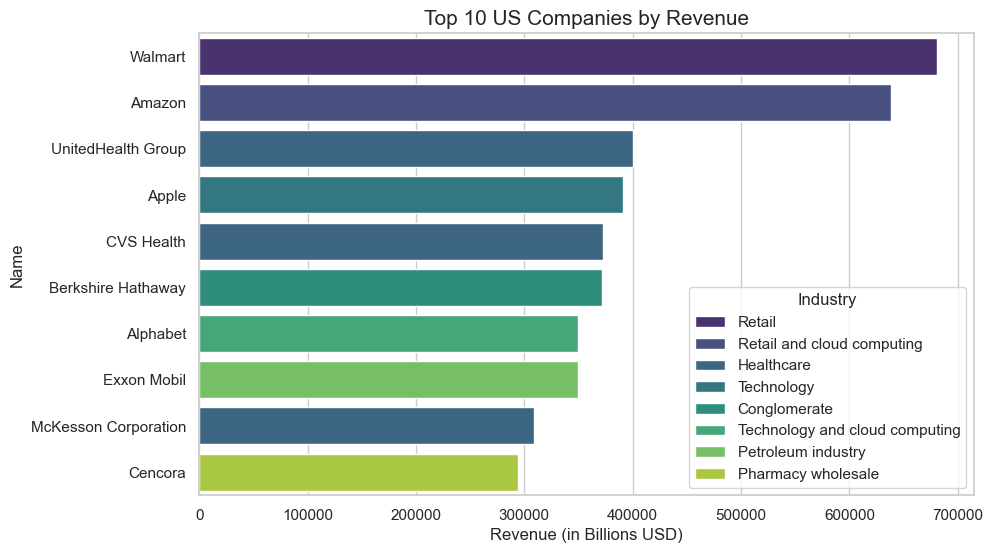

In [412]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting a nice "clean" style
sns.set_theme(style="whitegrid")

# Creating a figure size so it's not too small
plt.figure(figsize=(10, 6))


# sorting the data first
top_10 = df.nlargest(10, 'Revenue (USD millions)')

# Create the Bar Chart
sns.barplot(data=top_10, x='Revenue (USD millions)', y='Name', hue='Industry', palette='viridis')

# Add a title
plt.title('Top 10 US Companies by Revenue', fontsize=15)
plt.xlabel('Revenue (in Billions USD)')

# Show the plot
plt.show()

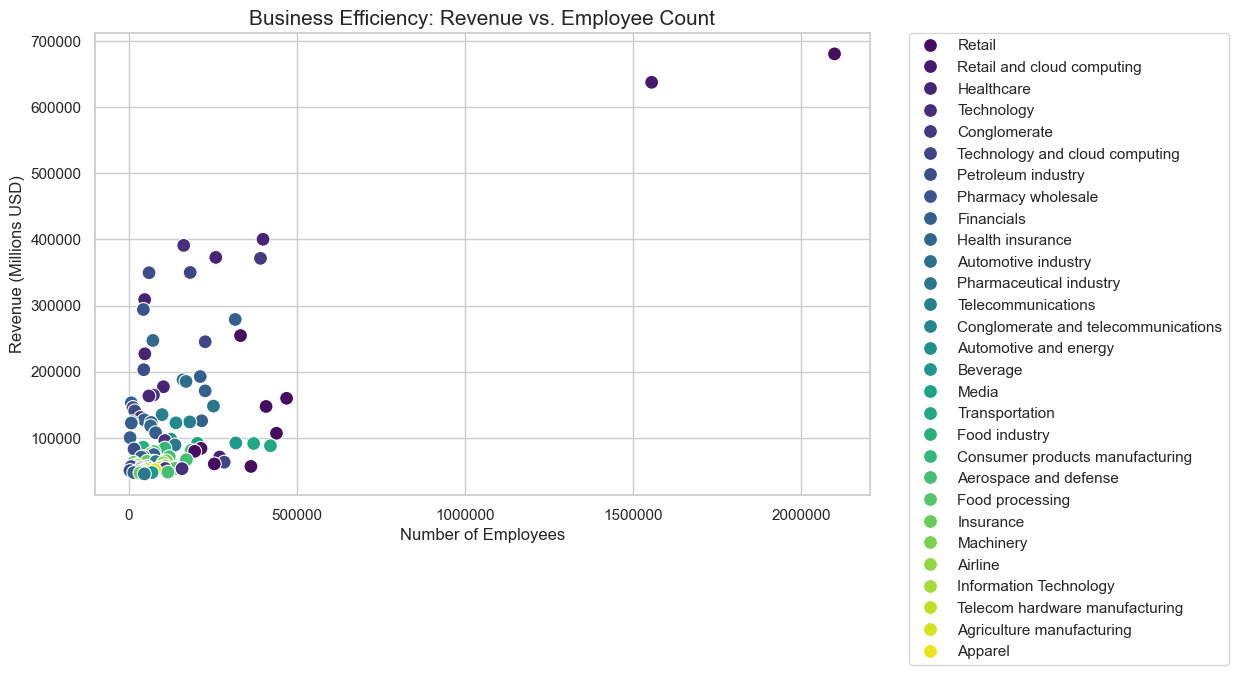

In [413]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Employees', y='Revenue (USD millions)', hue='Industry', palette='viridis', s=100)

plt.title('Business Efficiency: Revenue vs. Employee Count', fontsize=15)
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (Millions USD)')
# Use this to avoid the 10^1 scientific notation if you prefer standard numbers
plt.ticklabel_format(style='plain', axis='x') 

# Move the legend outside so it doesn't cover the data
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

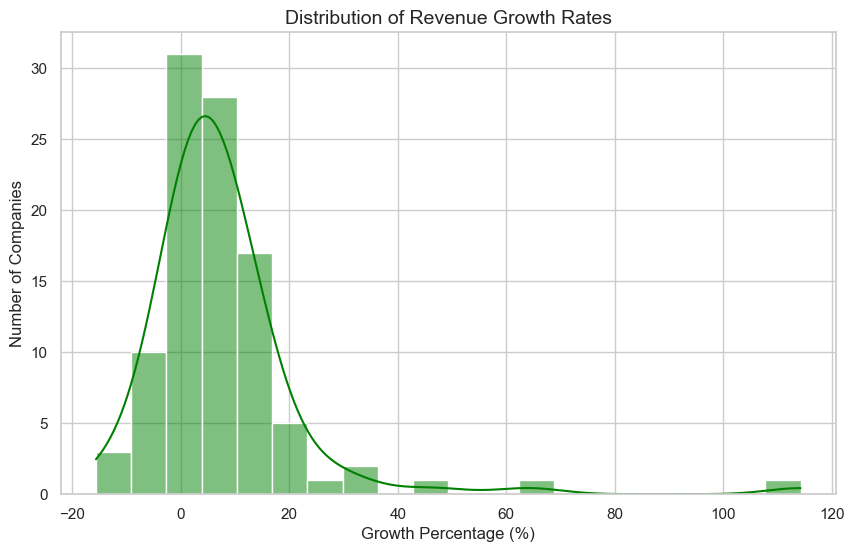

In [414]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue growth'], bins=20, kde=True, color='green')

plt.title('Distribution of Revenue Growth Rates', fontsize=14)
plt.xlabel('Growth Percentage (%)')
plt.ylabel('Number of Companies')
plt.show()

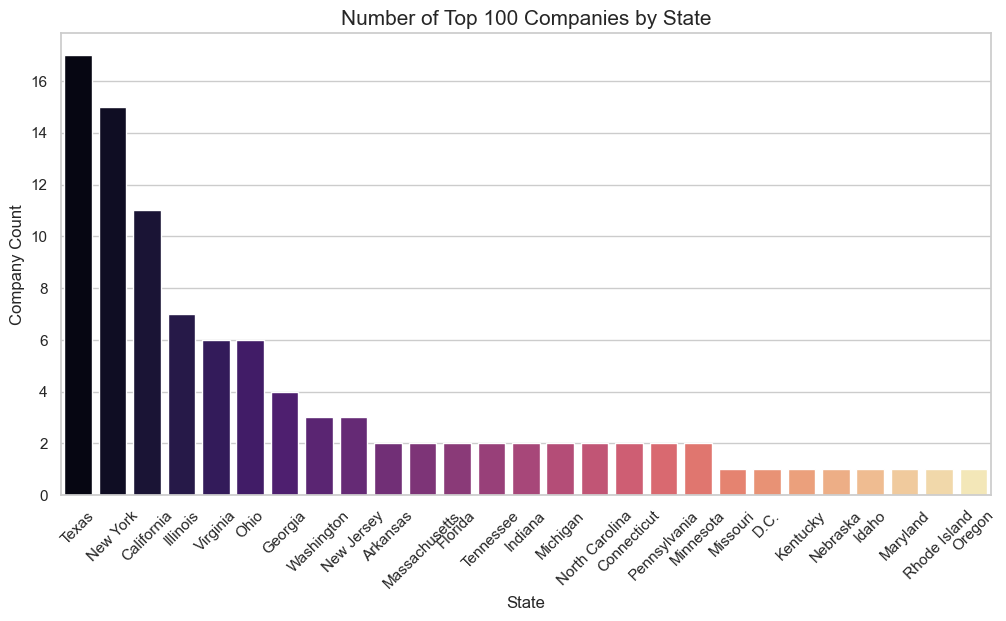

In [415]:
# 1. Split 'Headquarters' by the comma and take the last part (the State)
# .strip() removes any accidental leading spaces
df['State'] = df['Headquarters'].str.split(',').str[-1].str.strip()

# 2. Count companies per state
state_counts = df['State'].value_counts()

# 3. Plot it
plt.figure(figsize=(12, 6))
sns.barplot(
    x=state_counts.index, 
    y=state_counts.values, 
    hue=state_counts.index, # Assign x to hue
    palette='magma', 
    legend=False            # Hide the redundant legend
)

plt.title('Number of Top 100 Companies by State', fontsize=15)
plt.xticks(rotation=45) # Tilt the state names so they don't overlap
plt.ylabel('Company Count')
plt.show()

In [416]:
df.to_csv(r'C:\Users\user\Downloads\companies.csv', index = False)